In [184]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from random import choice
import math
from collections import Counter
import numpy as np

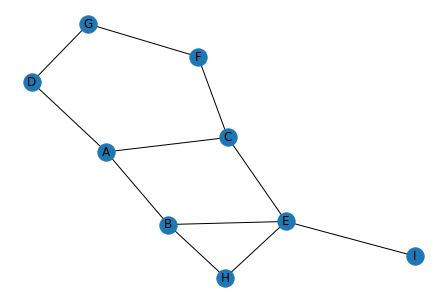

In [170]:
g = nx.Graph()
g.add_nodes_from("ABCDEFGHI")
g.add_edges_from([("A","B"),("B","H"),("B","E"),("H","E"),("E","I"),("E","C"),("C","F"),("F","G")
                  , ("A","C"),("A","D"),("F","G"),("D","G")])
nx.draw(g, with_labels=True)

In [258]:
def list_sampling_base(graph, target_size,V2= False):
    sampled_nodes  = [choice(list(graph.nodes))]
    sampled_edges = list()
    temp_store = [sampled_nodes[0]]
    CL = set()
    frequency = Counter()
    # node selection
    while(len(sampled_nodes)<target_size*len(graph.nodes)):
        for j in temp_store:
            neighborSet = set([n for n in graph[j]])
            frequency.update(neighborSet)
            CL = CL.union(neighborSet)
        CL = CL - set(sampled_nodes)
        k = math.ceil(math.sqrt(len(CL)))
        temp_store = []
        
        if(V2):
            p = list()
            for i in CL:
                p_hat = 1/graph.degree[i] + (1-(1-1/graph.degree[i])**frequency[i])
                p.append(p_hat)
            p_total = sum(p)
            p = [x/p_total for x in p]
            random_nodes = np.random.choice(a= list(CL),size = k, replace= False,p=p)
            CL.discard(set(random_nodes))
            if(len(CL)==0):
                CL=set()
            temp_store.extend(random_nodes)
            sampled_nodes.extend(random_nodes)
             
        else:
            for i in range(0,k):
                random_node = choice(list(CL))
                CL.remove(random_node)
                temp_store.append(random_node)
                sampled_nodes.extend(random_node)
    
    # graph induction
    for edge in graph.edges:
        node1 = edge[0]
        node2 = edge[1]
        if(node1 in sampled_nodes and node2 in sampled_nodes):
            sampled_edges.append(edge)
    
    return sampled_nodes, sampled_edges

In [261]:
list_sampling_base(g,0.5, V2=True)

{'C', 'G'}
['G' 'C']
{'C', 'G'}
{'D', 'E', 'A'}
['D' 'A']
{'D', 'E', 'A'}


(['F', 'G', 'C', 'D', 'A'],
 [('A', 'C'), ('A', 'D'), ('C', 'F'), ('D', 'G'), ('F', 'G')])

In [34]:
choice(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])

'F'

In [92]:
print(g.edges)

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'H'), ('B', 'E'), ('C', 'E'), ('C', 'F'), ('D', 'G'), ('E', 'H'), ('E', 'I'), ('F', 'G')]


In [234]:

np.random.choice(["B","C","H"], p = [0.2857142857142857, 0.2857142857142857, 0.4285714285714286])

'H'